<a href="https://colab.research.google.com/github/Goodevil01/Data-Prep-Ca1-/blob/main/Strategic_Thinking_Ca2_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [127]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.preprocessing.sequence import TimeseriesGenerator
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error
from tensorflow.keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from sklearn.tree import DecisionTreeRegressor
from tensorflow.keras.layers import LSTM, Dropout, Dense
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import os
import datetime
from tensorflow.keras.callbacks import ModelCheckpoint, TensorBoard
from sklearn.svm import SVR
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import Callback
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import label_binarize
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score




In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [73]:
df = df = pd.read_csv('/content/drive/MyDrive/BTC-USD.csv')


In [4]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-03,314.846008,315.149994,281.082001,281.082001,281.082001,33054400
1,2015-01-04,281.145996,287.230011,257.612000,264.195007,264.195007,55629100
2,2015-01-05,265.084015,278.341003,265.084015,274.473999,274.473999,43962800
3,2015-01-06,274.610992,287.553009,272.696014,286.188995,286.188995,23245700
4,2015-01-07,286.076996,298.753998,283.079010,294.337006,294.337006,24866800


In [5]:
df.shape

(3104, 7)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3104 entries, 0 to 3103
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       3104 non-null   object 
 1   Open       3104 non-null   float64
 2   High       3104 non-null   float64
 3   Low        3104 non-null   float64
 4   Close      3104 non-null   float64
 5   Adj Close  3104 non-null   float64
 6   Volume     3104 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 169.9+ KB


In [7]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,3104.000000,3104.000000,3104.000000,3104.000000,3104.000000,3.104000e+03
mean,14041.039379,14385.041532,13664.743745,14049.414854,14049.414854,1.715624e+10
std,16095.940891,16500.087552,15634.140273,16093.557426,16093.557426,1.962263e+10
min,176.897003,211.731003,171.509995,178.102997,178.102997,1.060090e+07
25%,1035.762481,1052.200043,1014.922485,1037.797515,1037.797515,2.255415e+08
50%,8051.509277,8227.814941,7841.081788,8050.035400,8050.035400,1.216461e+10
75%,20629.445801,21144.436035,20235.452637,20648.897949,20648.897949,2.825679e+10
max,67549.734375,68789.625000,66382.062500,67566.828125,67566.828125,3.509679e+11


In [8]:
print(df.duplicated().sum())


0


In [9]:
null_values = df.isnull().sum()
print(null_values)


Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [10]:
df['Date'] = pd.to_datetime(df['Date'])

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3104 entries, 0 to 3103
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       3104 non-null   datetime64[ns]
 1   Open       3104 non-null   float64       
 2   High       3104 non-null   float64       
 3   Low        3104 non-null   float64       
 4   Close      3104 non-null   float64       
 5   Adj Close  3104 non-null   float64       
 6   Volume     3104 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 169.9 KB


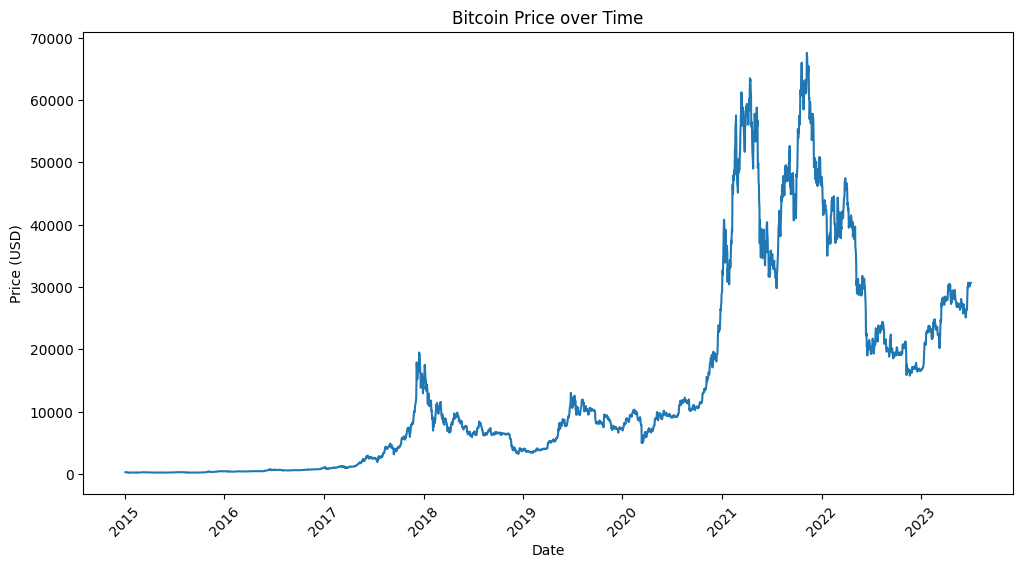

In [12]:
# Visualize Bitcoin price over time using a line plot
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'])
plt.title('Bitcoin Price over Time')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.xticks(rotation=45)
plt.show()

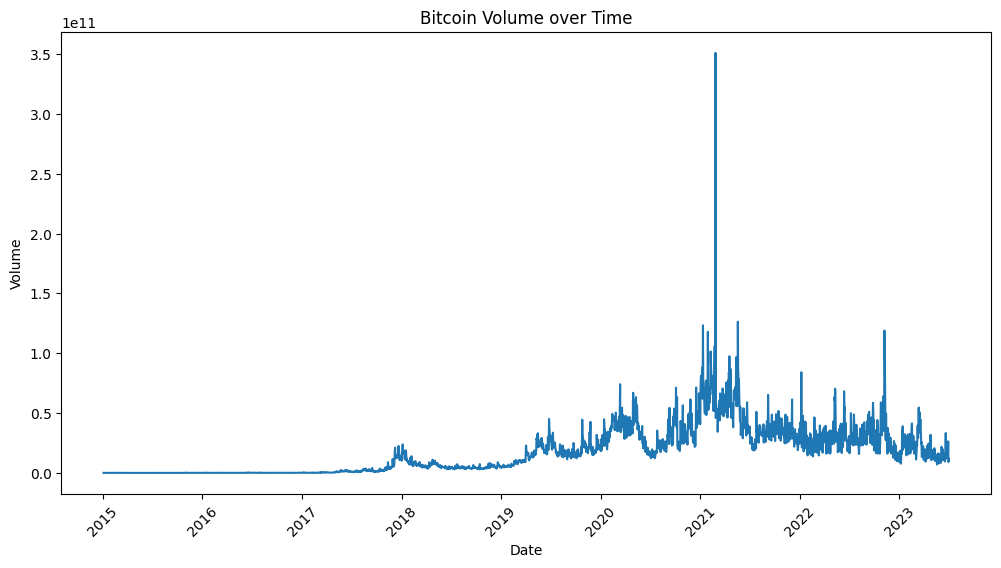

In [13]:
# Visualize Bitcoin volume over time using a line plot
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Volume'])
plt.title('Bitcoin Volume over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.xticks(rotation=45)
plt.show()

In [14]:
# Calculate basic statistics for Bitcoin prices and volumes
price_stats = df['Close'].describe()
volume_stats = df['Volume'].describe()

print("Price Statistics:")
print(price_stats)

print("\nVolume Statistics:")
print(volume_stats)

Price Statistics:
count     3104.000000
mean     14049.414854
std      16093.557426
min        178.102997
25%       1037.797515
50%       8050.035400
75%      20648.897949
max      67566.828125
Name: Close, dtype: float64

Volume Statistics:
count    3.104000e+03
mean     1.715624e+10
std      1.962263e+10
min      1.060090e+07
25%      2.255415e+08
50%      1.216461e+10
75%      2.825679e+10
max      3.509679e+11
Name: Volume, dtype: float64


In [15]:
# Define criteria for bull and bear markets
bull_threshold = 0.1  # Percentage change threshold for bull market (e.g., 10% increase)
bear_threshold = -0.1  # Percentage change threshold for bear market (e.g., 10% decrease)

# Calculate the percentage change in Bitcoin prices
df['Price_Change'] = df['Close'].pct_change()

# Create a new column indicating the market cycle
df['Market_Cycle'] = 'Neutral'  # Initialize all values as 'Neutral'

# Apply the criteria to identify bull and bear markets
df.loc[df['Price_Change'] > bull_threshold, 'Market_Cycle'] = 'Bull'
df.loc[df['Price_Change'] < bear_threshold, 'Market_Cycle'] = 'Bear'

# Print the first few rows of the dataset with the market cycle column
print(df.head())

        Date        Open        High         Low       Close   Adj Close  \
0 2015-01-03  314.846008  315.149994  281.082001  281.082001  281.082001   
1 2015-01-04  281.145996  287.230011  257.612000  264.195007  264.195007   
2 2015-01-05  265.084015  278.341003  265.084015  274.473999  274.473999   
3 2015-01-06  274.610992  287.553009  272.696014  286.188995  286.188995   
4 2015-01-07  286.076996  298.753998  283.079010  294.337006  294.337006   

     Volume  Price_Change Market_Cycle  
0  33054400           NaN      Neutral  
1  55629100     -0.060079      Neutral  
2  43962800      0.038907      Neutral  
3  23245700      0.042682      Neutral  
4  24866800      0.028471      Neutral  


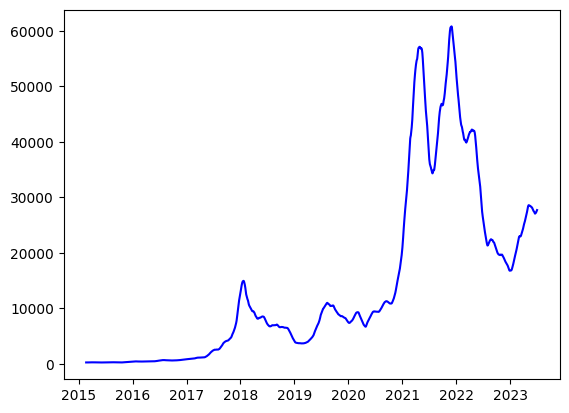

In [16]:
moving_avg = df['Close'].rolling(window=50).mean()
plt.plot(df['Date'], moving_avg, color='blue', label='50-day Moving Average')

# Show the plot
plt.show()


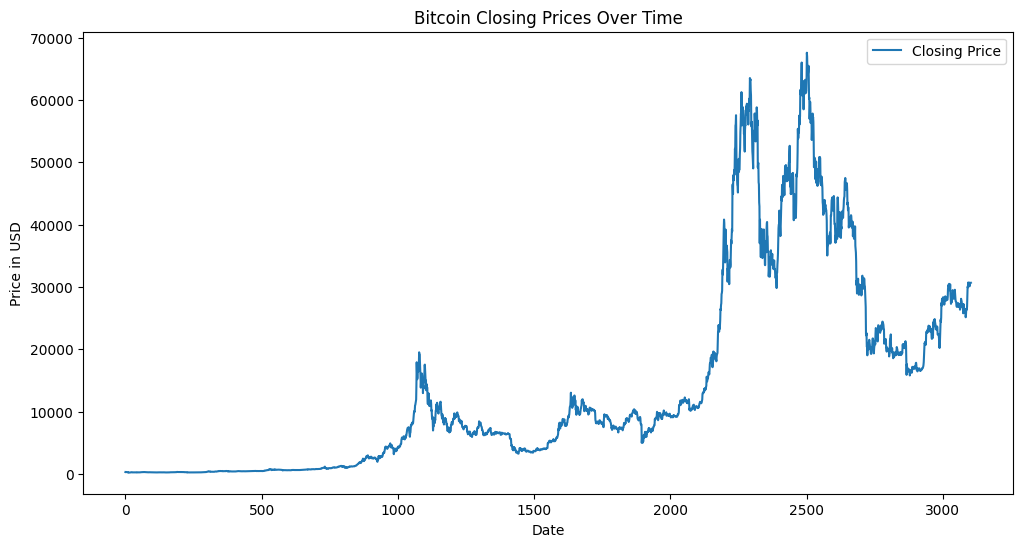

In [17]:
# Plotting the closing prices
plt.figure(figsize=(12,6))
plt.plot(df['Close'], label='Closing Price')
plt.title('Bitcoin Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price in USD')
plt.legend()
plt.show()

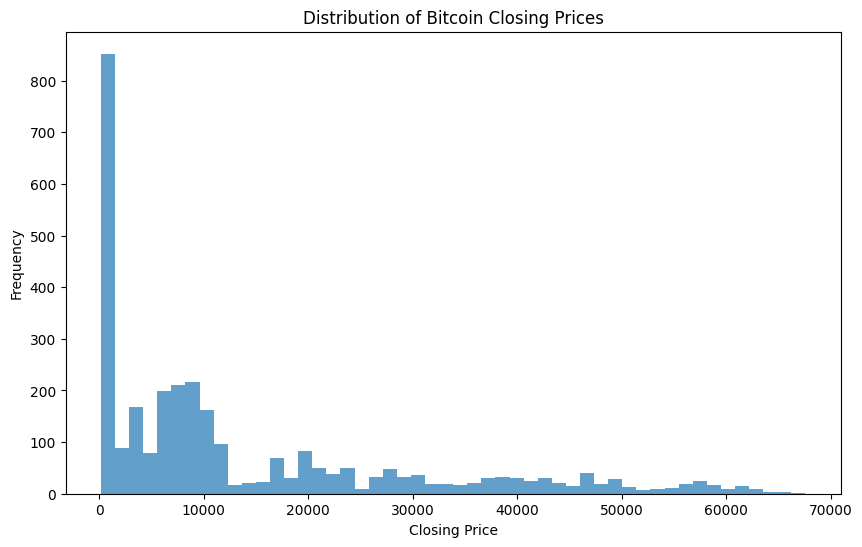

In [18]:
# Plotting a histogram to understand the distribution of closing prices
plt.figure(figsize=(10,6))
plt.hist(df['Close'], bins=50, alpha=0.7)
plt.title('Distribution of Bitcoin Closing Prices')
plt.xlabel('Closing Price')
plt.ylabel('Frequency')
plt.show()


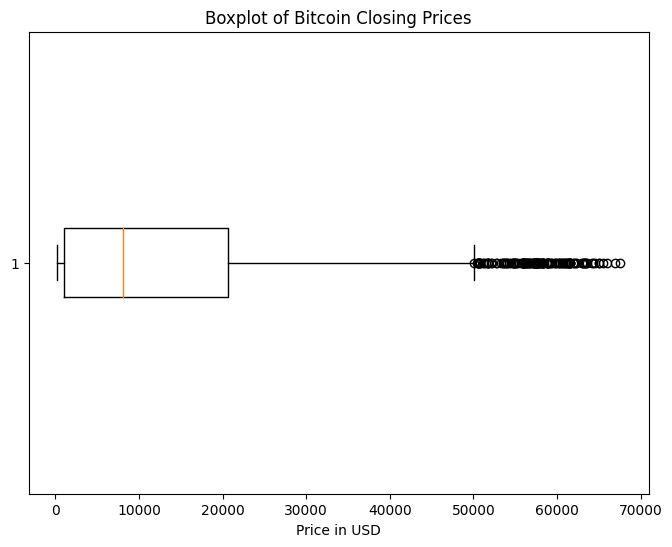

In [19]:
# Using a boxplot to identify outliers in closing prices
plt.figure(figsize=(8,6))
plt.boxplot(df['Close'], vert=False)
plt.title('Boxplot of Bitcoin Closing Prices')
plt.xlabel('Price in USD')
plt.show()

In [20]:
df['Daily_Percent_Change'] = df['Close'].pct_change() * 100  # Multiply by 100 to convert to percentage


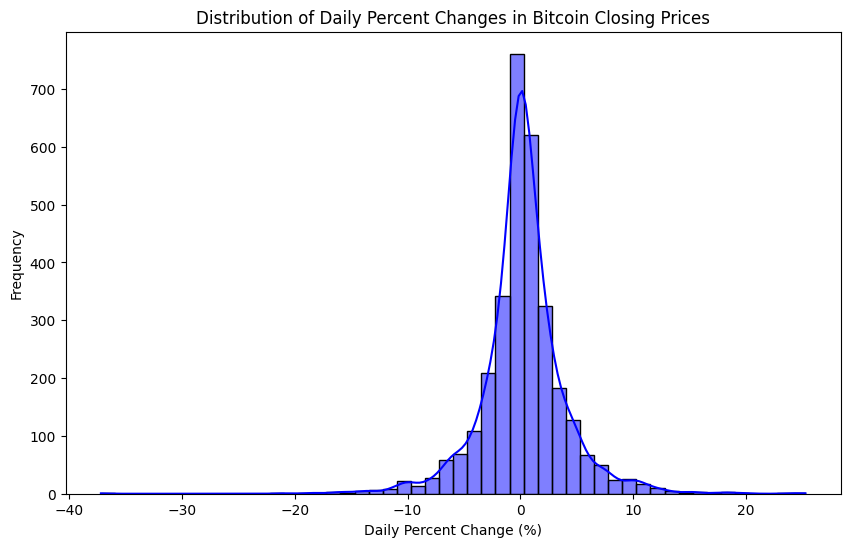

In [21]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Daily_Percent_Change'].dropna(), bins=50, kde=True, color='blue')  # dropna() to remove NaN values from the plot
plt.title('Distribution of Daily Percent Changes in Bitcoin Closing Prices')
plt.xlabel('Daily Percent Change (%)')
plt.ylabel('Frequency')
plt.show()

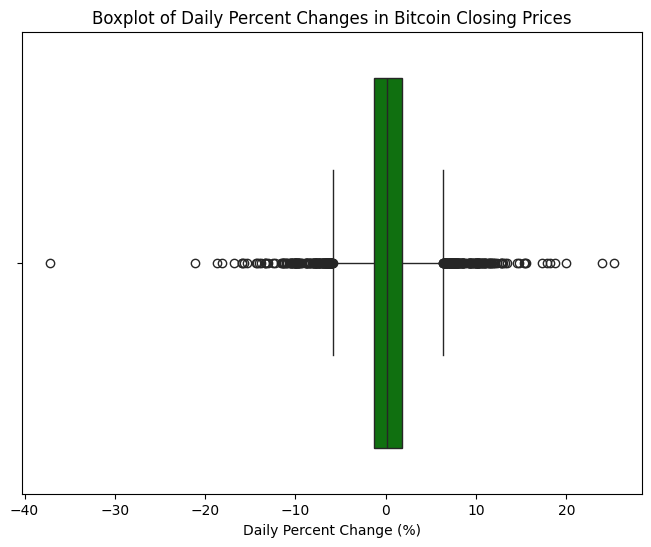

In [22]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Daily_Percent_Change'], color='green')
plt.title('Boxplot of Daily Percent Changes in Bitcoin Closing Prices')
plt.xlabel('Daily Percent Change (%)')
plt.show()


In [23]:
# Checking for missing values
missing_values = df.isnull().sum()
print('Missing values in each column:\n', missing_values)

Missing values in each column:
 Date                    0
Open                    0
High                    0
Low                     0
Close                   0
Adj Close               0
Volume                  0
Price_Change            1
Market_Cycle            0
Daily_Percent_Change    1
dtype: int64


In [24]:
mapping = {'Neutral': 0, 'Bear': -1, 'Bull': 1}  # Adjust mapping as necessary
df['Price_Change'] = df['Price_Change'].replace(mapping)


In [25]:
print(df.info())  # Check data types
print(df.head())  # Inspect the first few rows


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3104 entries, 0 to 3103
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Date                  3104 non-null   datetime64[ns]
 1   Open                  3104 non-null   float64       
 2   High                  3104 non-null   float64       
 3   Low                   3104 non-null   float64       
 4   Close                 3104 non-null   float64       
 5   Adj Close             3104 non-null   float64       
 6   Volume                3104 non-null   int64         
 7   Price_Change          3103 non-null   float64       
 8   Market_Cycle          3104 non-null   object        
 9   Daily_Percent_Change  3103 non-null   float64       
dtypes: datetime64[ns](1), float64(7), int64(1), object(1)
memory usage: 242.6+ KB
None
        Date        Open        High         Low       Close   Adj Close  \
0 2015-01-03  314.846008  315.149

In [26]:
# Identifying outliers (for example, in the 'Close' column)
Q1 = df['Close'].quantile(0.25)
Q3 = df['Close'].quantile(0.75)
IQR = Q3 - Q1

# Defining bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Handling outliers (e.g., capping)
df['Close'] = df['Close'].clip(lower=lower_bound, upper=upper_bound)

In [27]:
# Feature Engineering (e.g., creating a 'Daily Return' feature)
df['Daily Return'] = df['Close'].pct_change()

# Normalizing data (Min-Max scaling)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# Assuming you want to scale 'Close' and 'Volume' columns
df[['Close', 'Volume']] = scaler.fit_transform(df[['Close', 'Volume']])

In [28]:
# Simple Linear Regression: Predicting 'Close' based on 'Volume'
X = df['Volume']  # Predictor variable
y = df['Close']   # Response variable

# Adding a constant to the model (intercept)
X = sm.add_constant(X)

# Fitting the regression model
model = sm.OLS(y, X).fit()

# Summary of the model
model_summary = model.summary()
print(model_summary)

                            OLS Regression Results                            
Dep. Variable:                  Close   R-squared:                       0.496
Model:                            OLS   Adj. R-squared:                  0.496
Method:                 Least Squares   F-statistic:                     3056.
Date:                Mon, 06 May 2024   Prob (F-statistic):               0.00
Time:                        04:09:58   Log-Likelihood:                 351.53
No. Observations:                3104   AIC:                            -699.1
Df Residuals:                    3102   BIC:                            -687.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0837      0.005     16.250      0.0

In [29]:
# Selecting features
X = df[['Open', 'High', 'Low', 'Volume']]  # You can choose other columns as well

# Selecting the target variable
y = df['Close']


In [30]:
df['Close_Lag1'] = df['Close'].shift(1)  # This creates a new column where each row is the previous day's 'Close' price

# Adjusting the features and target variable
X = df[['Open', 'High', 'Low', 'Volume', 'Close_Lag1']].dropna()  # Include the lagged feature
y = df['Close'].shift(-1).dropna()  # Predicting the next day's 'Close' price

In [31]:
 # Random Forest Example
def random_forest_model(X, y):
    # Splitting the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initialize the Random Forest Regressor
    rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

    # Fit the model
    rf_model.fit(X_train, y_train)

    # Make predictions
    y_pred = rf_model.predict(X_test)

    # Calculate Mean Squared Error
    mse = mean_squared_error(y_test, y_pred)
    print("Random Forest MSE:", mse)

# Gradient Boosting Example
def gradient_boosting_model(X, y):
    # Splitting the dataset
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initialize Gradient Boosting Regressor
    gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)

    # Fit the model
    gb_model.fit(X_train, y_train)

    # Predict
    y_pred = gb_model.predict(X_test)

    # Calculate Mean Squared Error
    mse = mean_squared_error(y_test, y_pred)
    print("Gradient Boosting MSE:", mse)

In [32]:
# LSTM Example
def lstm_model(data, feature_columns, target_column):
    # Preparing data for LSTM
    data = data[feature_columns + [target_column]]
    data_scaled = data.values

    # Generator for the time series
    n_input = 3  # number of steps
    n_features = len(feature_columns)
    generator = TimeseriesGenerator(data_scaled, data_scaled[:, -1], length=n_input, batch_size=1)

    # LSTM model
    model = Sequential()
    model.add(LSTM(50, activation='relu', input_shape=(n_input, n_features)))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')

    # Fit model
    model.fit(generator, steps_per_epoch=1, epochs=200, verbose=1)

    return model

In [33]:

time_steps = 5  # Example: using 5 days of prices to predict the next day
df_lagged = pd.concat([df['Close'].shift(i) for i in range(time_steps, -1, -1)], axis=1)

# Drop missing values created by lagging
df_lagged.dropna(inplace=True)

# Features and labels
X = df_lagged.iloc[:, :-1].values
y = df_lagged.iloc[:, -1].values

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Reshaping X for LSTM input
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Scaling the features
scaler = MinMaxScaler(feature_range=(0, 1))
X_train_scaled = scaler.fit_transform(X_train.reshape(-1, X_train.shape[-1])).reshape(X_train.shape)
X_test_scaled = scaler.transform(X_test.reshape(-1, X_test.shape[-1])).reshape(X_test.shape)

In [34]:
model = Sequential([
    LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    LSTM(units=50),
    Dense(units=1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
78/78 [==============================] - 11s 8ms/step - loss: 0.0150
Epoch 2/100
78/78 [==============================] - 1s 9ms/step - loss: 5.0730e-04
Epoch 3/100
78/78 [==============================] - 1s 12ms/step - loss: 4.0581e-04
Epoch 4/100
78/78 [==============================] - 1s 8ms/step - loss: 4.1056e-04
Epoch 5/100
78/78 [==============================] - 1s 9ms/step - loss: 4.0256e-04
Epoch 6/100
78/78 [==============================] - 1s 11ms/step - loss: 4.0151e-04
Epoch 7/100
78/78 [==============================] - 1s 11ms/step - loss: 4.1330e-04
Epoch 8/100
78/78 [==============================] - 1s 11ms/step - loss: 4.3434e-04
Epoch 9/100
78/78 [==============================] - 1s 12ms/step - loss: 4.1079e-04
Epoch 10/100
78/78 [==============================] - 1s 10ms/step - loss: 3.9561e-04
Epoch 11/100
78/78 [==============================] - 1s 8ms/step - loss: 4.2624e-04
Epoch 12/100
78/78 [==============================] - 1s 7ms/step - los

20/20 [==============================] - 1s 3ms/step


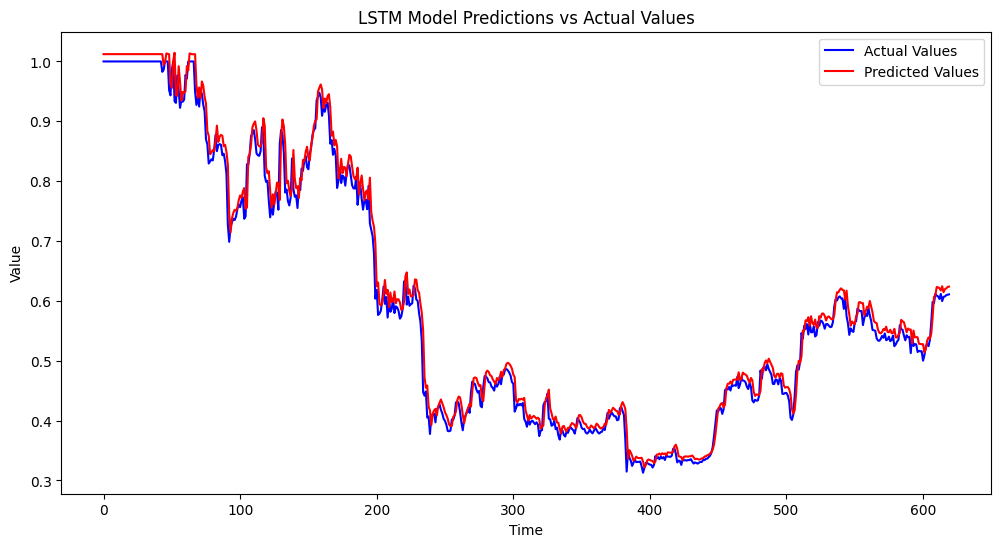

In [35]:
# Assuming 'model' is your trained LSTM model and you have X_test_scaled and y_test ready
# Make predictions
predictions = model.predict(X_test_scaled)

# Visualizing the predictions vs actual values
plt.figure(figsize=(12,6))
plt.plot(y_test, label='Actual Values', color='blue')
plt.plot(predictions, label='Predicted Values', color='red')
plt.title('LSTM Model Predictions vs Actual Values')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

In [36]:
# Assuming you have the true values 'y_test' and the predictions 'predictions'
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)

print('Mean Absolute Error (MAE):', mae)
print('Mean Squared Error (MSE):', mse)
print('Root Mean Squared Error (RMSE):', rmse)

Mean Absolute Error (MAE): 0.016189182441121563
Mean Squared Error (MSE): 0.0004855744948356572
Root Mean Squared Error (RMSE): 0.022035754918669277


In [37]:
# Create the scaler
scaler = MinMaxScaler(feature_range=(0, 1))

# Assuming X_train and X_test are your data arrays with shape [samples, time steps, features]
# Reshape to 2D
num_samples, num_time_steps, num_features = X_train.shape
X_train_reshaped = X_train.reshape((num_samples * num_time_steps, num_features))

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train_reshaped)

# Transform the test data
num_samples_test, _, _ = X_test.shape
X_test_reshaped = X_test.reshape((num_samples_test * num_time_steps, num_features))
X_test_scaled = scaler.transform(X_test_reshaped)

# Reshape back to 3D
X_train_scaled = X_train_scaled.reshape((num_samples, num_time_steps, num_features))
X_test_scaled = X_test_scaled.reshape((num_samples_test, num_time_steps, num_features))


In [38]:
# Define your LSTM model architecture
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train_scaled.shape[1], X_train_scaled.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(
    X_train_scaled, y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)


Epoch 1/100
62/62 [==============================] - 6s 36ms/step - loss: 0.0024 - val_loss: 0.0019
Epoch 2/100
62/62 [==============================] - 1s 15ms/step - loss: 2.1321e-04 - val_loss: 0.0018
Epoch 3/100
62/62 [==============================] - 1s 13ms/step - loss: 2.2559e-04 - val_loss: 0.0022
Epoch 4/100
62/62 [==============================] - 1s 9ms/step - loss: 1.9881e-04 - val_loss: 0.0027
Epoch 5/100
62/62 [==============================] - 1s 10ms/step - loss: 2.0201e-04 - val_loss: 0.0027
Epoch 6/100
62/62 [==============================] - 1s 10ms/step - loss: 2.0583e-04 - val_loss: 0.0063
Epoch 7/100
62/62 [==============================] - 1s 10ms/step - loss: 1.8357e-04 - val_loss: 0.0046
Epoch 8/100
62/62 [==============================] - 1s 9ms/step - loss: 1.9338e-04 - val_loss: 0.0043
Epoch 9/100
62/62 [==============================] - 1s 9ms/step - loss: 1.8184e-04 - val_loss: 0.0045
Epoch 10/100
62/62 [==============================] - 1s 9ms/step - los

In [39]:
# Evaluate the model on the test set
test_loss = model.evaluate(X_test_scaled, y_test, verbose=1)

# Calculate evaluation metrics
predictions = model.predict(X_test_scaled)
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)

20/20 [==============================] - 1s 3ms/step


In [40]:
df['Moving_Average'] = df['Close'].rolling(window=5).mean()



20/20 [==============================] - 0s 3ms/step


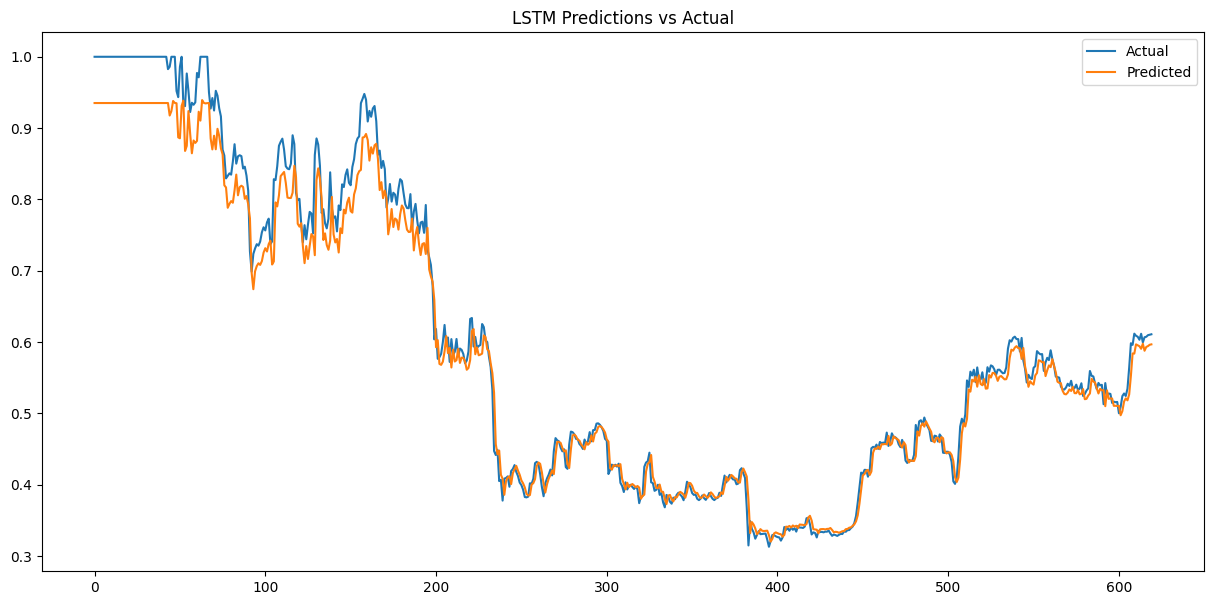

In [41]:
# Predict
predictions = model.predict(X_test_scaled)

# Visualize
plt.figure(figsize=(15, 7))
plt.plot(y_test, label='Actual')
plt.plot(predictions, label='Predicted')
plt.title('LSTM Predictions vs Actual')
plt.legend()
plt.show()


In [42]:
# Assuming predictions and y_test were scaled
predictions_original = scaler.inverse_transform(predictions)
y_test_original = scaler.inverse_transform(y_test.reshape(-1, 1))


In [43]:
history = model.fit(
    X_train_scaled, y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.2,  # Keras automatically holds out this fraction of the training data for validation
    verbose=1
)


Epoch 1/100
62/62 [==============================] - 1s 14ms/step - loss: 1.0825e-04 - val_loss: 0.0037
Epoch 2/100
62/62 [==============================] - 1s 13ms/step - loss: 8.6954e-05 - val_loss: 0.0028
Epoch 3/100
62/62 [==============================] - 1s 13ms/step - loss: 8.9959e-05 - val_loss: 0.0057
Epoch 4/100
62/62 [==============================] - 1s 14ms/step - loss: 9.4934e-05 - val_loss: 0.0039
Epoch 5/100
62/62 [==============================] - 1s 11ms/step - loss: 9.4120e-05 - val_loss: 0.0066
Epoch 6/100
62/62 [==============================] - 1s 9ms/step - loss: 1.0364e-04 - val_loss: 0.0021
Epoch 7/100
62/62 [==============================] - 1s 10ms/step - loss: 1.0875e-04 - val_loss: 0.0020
Epoch 8/100
62/62 [==============================] - 1s 9ms/step - loss: 9.5827e-05 - val_loss: 0.0027
Epoch 9/100
62/62 [==============================] - 1s 9ms/step - loss: 9.7731e-05 - val_loss: 0.0072
Epoch 10/100
62/62 [==============================] - 1s 9ms/step -

In [44]:
# Assuming y_true are the true labels and y_pred are the model's predictions
y_true = [...]  # replace with actual true labels
y_pred = [...]  # replace with actual predictions


In [45]:
y_true = np.array(y_true, dtype=object)
y_pred = np.array(y_pred, dtype=object)



In [46]:
# Check if they are of equal length
if len(y_true) != len(y_pred):
    raise ValueError("The length of y_true and y_pred must be the same.")


In [47]:
# Check if the input types are numeric or strings and handle accordingly
if np.issubdtype(y_true.dtype, np.number) and np.issubdtype(y_pred.dtype, np.number):
    # If numeric, check for NaN values directly
    if np.isnan(y_true).any() or np.isnan(y_pred).any():
        raise ValueError("NaN values found in input arrays.")
else:
    # If not numeric (e.g., strings), convert to integers using LabelEncoder
    le = LabelEncoder()
    y_true = le.fit_transform(y_true)
    y_pred = le.transform(y_pred)


In [48]:
# Now y_true and y_pred should be numeric, you can safely calculate metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='binary')
recall = recall_score(y_true, y_pred, average='binary')
f1 = f1_score(y_true, y_pred, average='binary')

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


In [49]:
# Output the results
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

Accuracy: 1.0
Precision: 0.0
Recall: 0.0
F1 Score: 0.0


In [50]:
# This step is only necessary if your labels are categorical (e.g., 'yes', 'no')
label_encoder = LabelEncoder()
y_true_encoded = label_encoder.fit_transform(y_true)
y_pred_encoded = label_encoder.transform(y_pred)

In [51]:
# Replace y_true and y_pred with y_true_encoded and y_pred_encoded if you performed encoding
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='binary')  # or 'macro'/'micro'/'weighted' for multiclass
recall = recall_score(y_true, y_pred, average='binary')  # ditto
f1 = f1_score(y_true, y_pred, average='binary')  # ditto

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

Accuracy: 1.0
Precision: 0.0
Recall: 0.0
F1 Score: 0.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


In [52]:
# Assuming y_true is a numpy array or a list
class_distribution = pd.Series(y_true).value_counts()
print(class_distribution)

0    1
Name: count, dtype: int64


In [53]:
# Print first 10 true and predicted labels
print("True labels:", y_true[:10])
print("Predicted labels:", y_pred[:10])

True labels: [0]
Predicted labels: [0]


In [54]:
# Convert it to numerical form using LabelEncoder if it's not already numerical
if df['Price_Change'].dtype == 'object':
    le = LabelEncoder()
    df['Price_Change'] = le.fit_transform(df['Price_Change'])

# Split data into features and target variable
X = df.drop('Price_Change', axis=1)
y = df['Price_Change']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [55]:
df['Date'] = pd.to_datetime(df['Date']).apply(lambda x: x.timestamp())


In [56]:
# Split data into features and target
X = df.drop('Price_Change', axis=1)
y = df['Price_Change']


In [57]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [58]:
# Initialize the Logistic Regression model
model = LogisticRegression()

In [59]:
# Assuming 'Neutral' is a category in the 'Market_Cycle' column
df = pd.get_dummies(df, columns=['Market_Cycle'])


In [60]:
print(df.columns)


Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'Price_Change', 'Daily_Percent_Change', 'Daily Return', 'Close_Lag1',
       'Moving_Average', 'Market_Cycle_Bear', 'Market_Cycle_Bull',
       'Market_Cycle_Neutral'],
      dtype='object')


In [61]:
# Assuming 'Price_Change' is your target variable
target_column_name = 'Price_Change'

# Features selection (excluding the target column and the 'Date' column)
features_columns = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
                    'Daily Return', 'Close_Lag1', 'Moving_Average',
                    'Market_Cycle_Bear', 'Market_Cycle_Bull', 'Market_Cycle_Neutral']

# Split data into features (X) and target (y)
X = df[features_columns]
y = df[target_column_name]

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [62]:
import numpy as np

# Check for NaN or infinite values in y_test and y_pred
print("NaN in y_test:", np.isnan(y_test).any())
print("Inf in y_test:", np.isinf(y_test).any())

print("NaN in y_pred:", np.isnan(y_pred).any())
print("Inf in y_pred:", np.isinf(y_pred).any())


NaN in y_test: True
Inf in y_test: False
NaN in y_pred: False
Inf in y_pred: False


In [63]:
# Assuming replacement is appropriate
y_test = np.nan_to_num(y_test, nan=np.nanmean(y_test), posinf=np.max(y_test[np.isfinite(y_test)]), neginf=np.min(y_test[np.isfinite(y_test)]))
y_pred = np.nan_to_num(y_pred, nan=np.nanmean(y_pred), posinf=np.max(y_pred[np.isfinite(y_pred)]), neginf=np.min(y_pred[np.isfinite(y_pred)]))


In [64]:
# Impute missing values with median
imputer = SimpleImputer(strategy='median')

# Create a pipeline that first imputes the data then fits the model
pipeline = make_pipeline(imputer, RandomForestRegressor(random_state=42))

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

# Predict on the test data
y_pred = pipeline.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the results
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 2.7907882541485532e-05
R-squared: 0.978839715611334


In [65]:
X = np.random.rand(100, 10)  # 100 samples, 10 features
y = np.random.rand(100)  # 100 target values

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Make predictions
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# Calculate MSE for both sets
train_mse = mean_squared_error(y_train, train_predictions)
test_mse = mean_squared_error(y_test, test_predictions)

print(f"Training MSE: {train_mse}")
print(f"Test MSE: {test_mse}")

Training MSE: 0.011888012530910003
Test MSE: 0.1073725124915342


In [66]:
data = {
    'A': np.random.randn(100),
    'B': np.random.randn(100) * 100,
    'C': np.random.rand(100) * 10
}
df = pd.DataFrame(data)

# Check for missing values
missing_values = df.isnull().sum()
print("Missing values per column:\n", missing_values)

# Calculate outliers using IQR
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()
print("Outliers per column:\n", outliers)


Missing values per column:
 A    0
B    0
C    0
dtype: int64
Outliers per column:
 A    0
B    0
C    0
dtype: int64


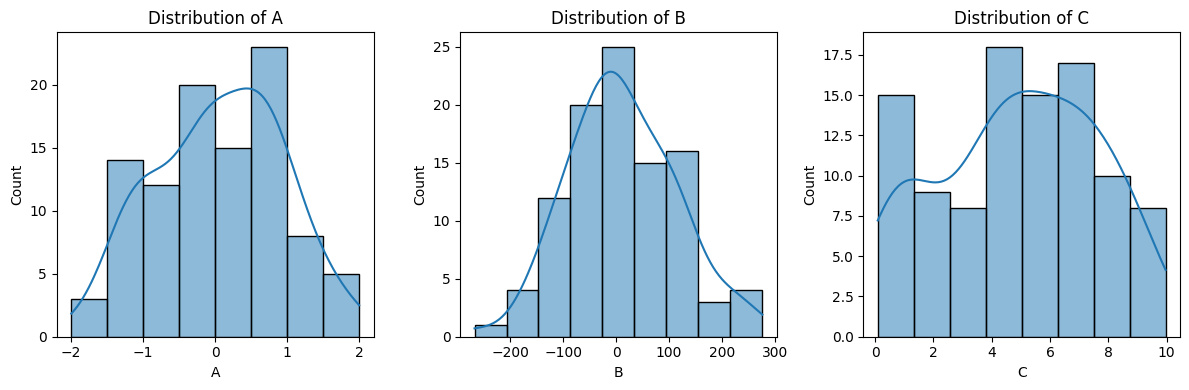

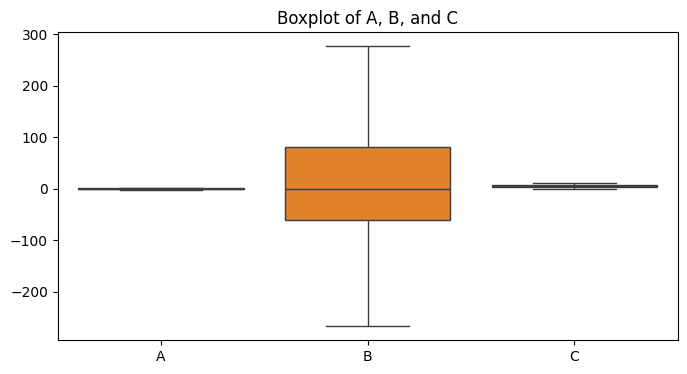

In [67]:
# Histograms for visualizing distributions
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
sns.histplot(df['A'], kde=True)
plt.title('Distribution of A')

plt.subplot(1, 3, 2)
sns.histplot(df['B'], kde=True)
plt.title('Distribution of B')

plt.subplot(1, 3, 3)
sns.histplot(df['C'], kde=True)
plt.title('Distribution of C')
plt.tight_layout()
plt.show()

# Box plots to visualize outliers
plt.figure(figsize=(8, 4))
sns.boxplot(data=df[['A', 'B', 'C']])
plt.title('Boxplot of A, B, and C')
plt.show()

In [68]:
Q1 = df['A'].quantile(0.25)
Q3 = df['A'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
df_filtered = df[(df['A'] >= lower_bound) & (df['A'] <= upper_bound)]


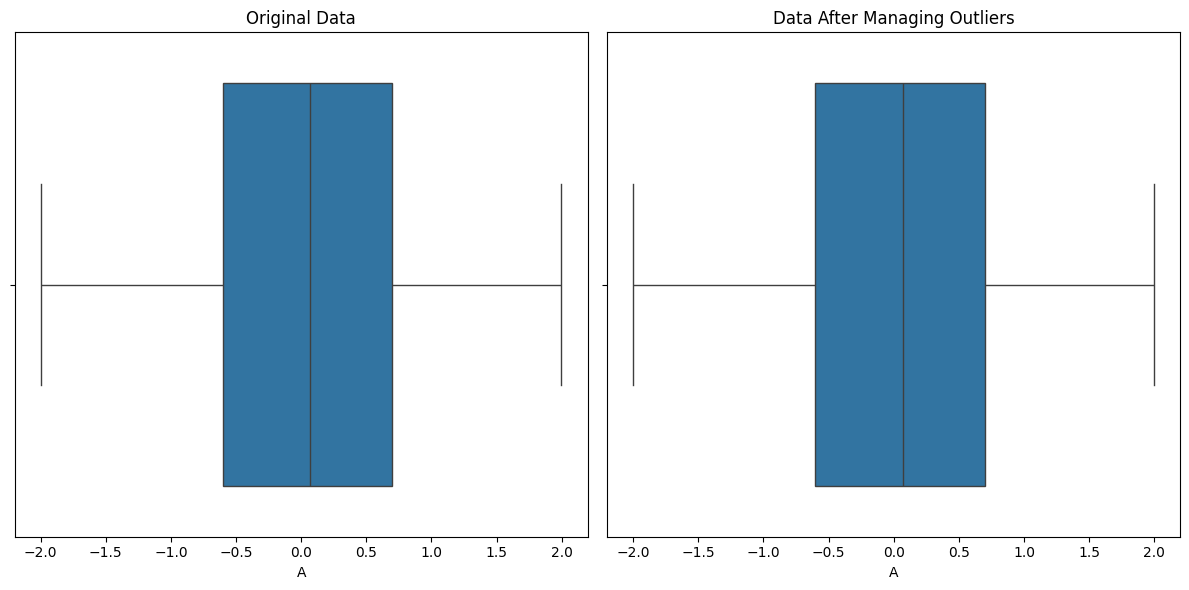

In [69]:
# Original Data
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x=df['A'])
plt.title('Original Data')

# Data after handling outliers
plt.subplot(1, 2, 2)
sns.boxplot(x=df_filtered['A'] if 'df_filtered' in locals() else df['A'])
plt.title('Data After Managing Outliers')

plt.tight_layout()
plt.show()

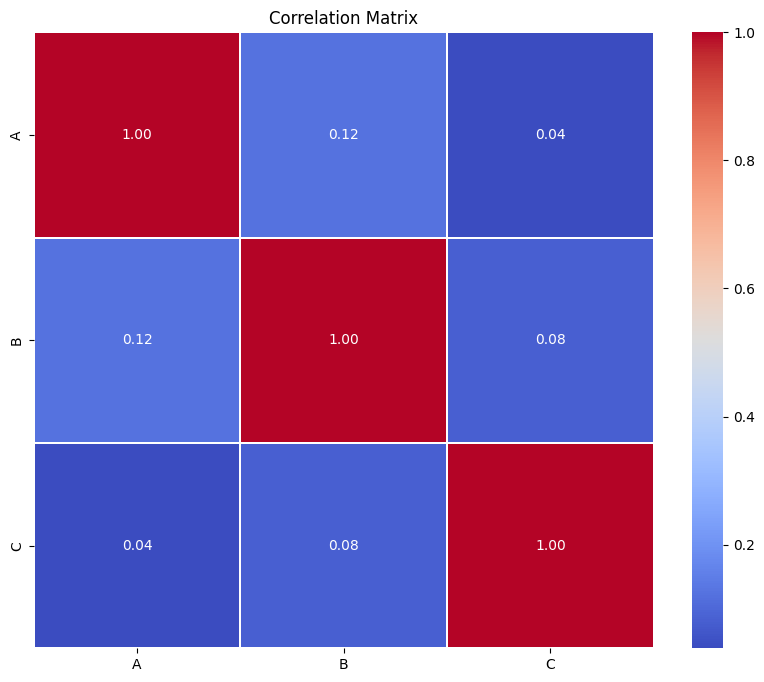

In [70]:
# Assuming df is your DataFrame with relevant Bitcoin data
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.05)
plt.title('Correlation Matrix')
plt.show()

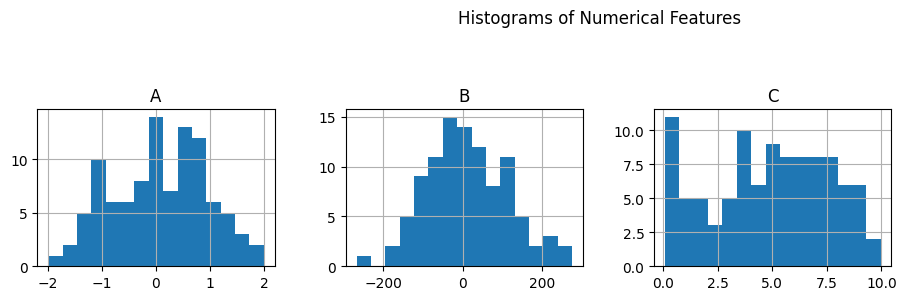

In [71]:
df.hist(bins=15, figsize=(15, 10), layout=(4, 4))
plt.suptitle('Histograms of Numerical Features')
plt.show()

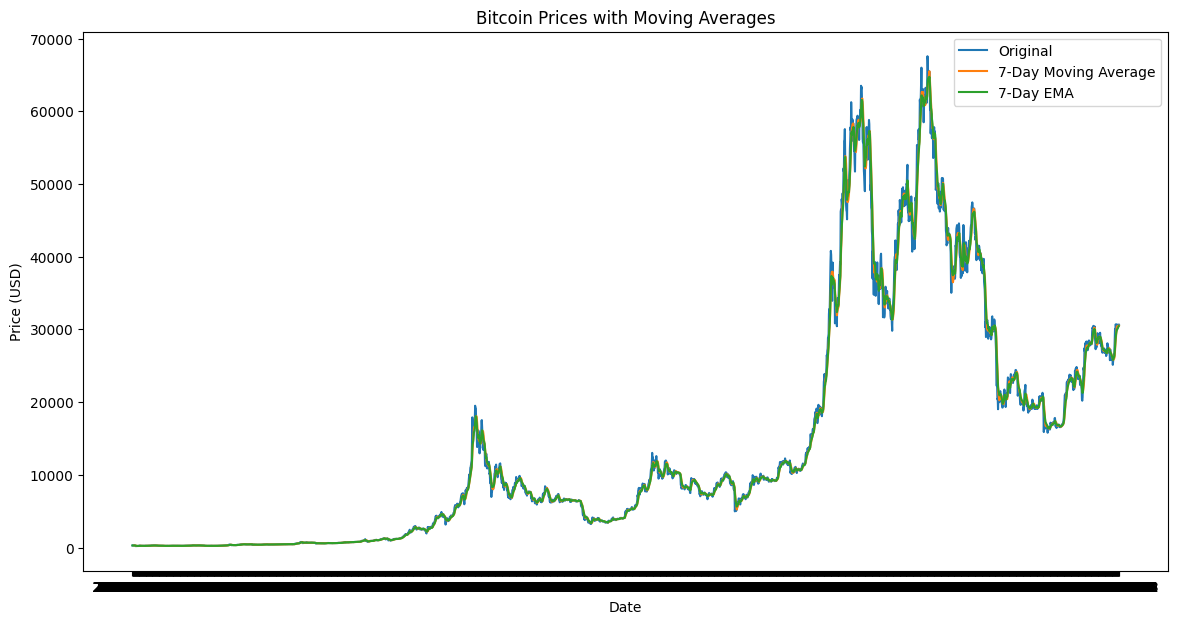

In [74]:
df['Moving_Average_7d'] = df['Close'].rolling(window=7).mean()

# Create an exponential moving average
df['EMA_7d'] = df['Close'].ewm(span=7, adjust=False).mean()

plt.figure(figsize=(14, 7))
plt.plot(df['Date'], df['Close'], label='Original')
plt.plot(df['Date'], df['Moving_Average_7d'], label='7-Day Moving Average')
plt.plot(df['Date'], df['EMA_7d'], label='7-Day EMA')
plt.title('Bitcoin Prices with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

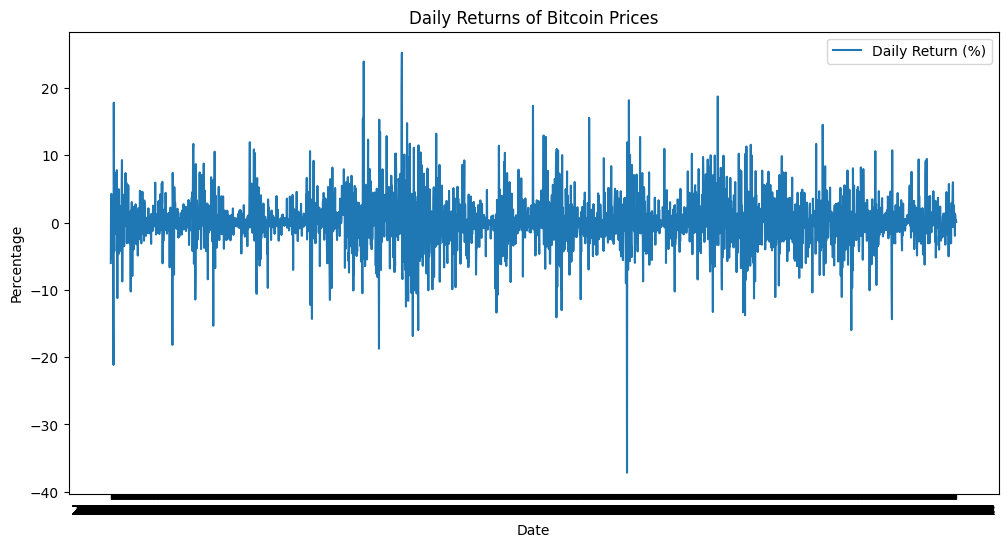

In [75]:
# Daily percentage change
df['Daily_Return'] = df['Close'].pct_change() * 100

# Plot daily returns
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Daily_Return'], label='Daily Return (%)')
plt.title('Daily Returns of Bitcoin Prices')
plt.xlabel('Date')
plt.ylabel('Percentage')
plt.legend()
plt.show()



In [76]:
# Create lagged features
df['Lag_1'] = df['Close'].shift(1)
df['Lag_2'] = df['Close'].shift(2)

# Drop NaN values that were created due to shifting
df.dropna(inplace=True)


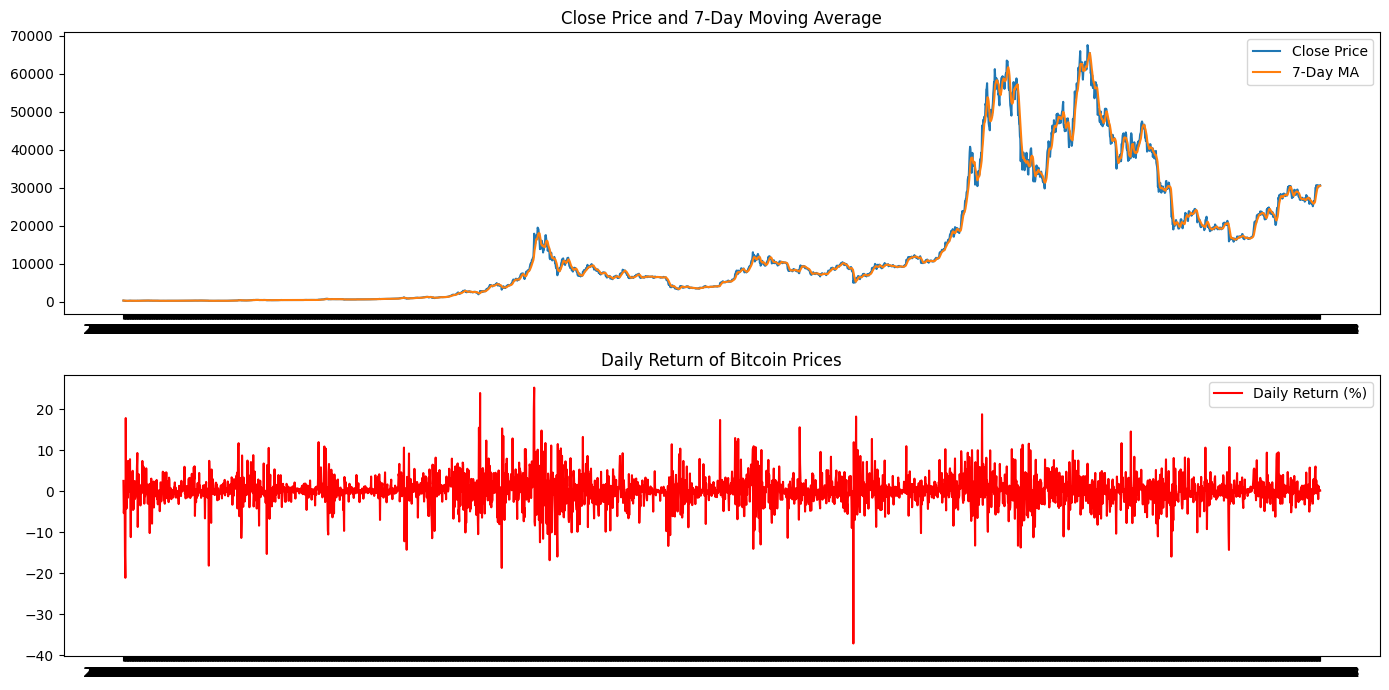

In [77]:
plt.figure(figsize=(14, 7))
plt.subplot(2, 1, 1)
plt.plot(df['Date'], df['Close'], label='Close Price')
plt.plot(df['Date'], df['Moving_Average_7d'], label='7-Day MA')
plt.title('Close Price and 7-Day Moving Average')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(df['Date'], df['Daily_Return'], label='Daily Return (%)', color='red')
plt.title('Daily Return of Bitcoin Prices')
plt.legend()
plt.tight_layout()
plt.show()


In [78]:
X = df[['Open', 'High', 'Low', 'Volume']]
y = df['Close']

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Make predictions
y_pred = lr_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Linear Regression MSE: {mse}")

Linear Regression MSE: 99016.98182203226


In [82]:
# Create scaler instance for the target
scaler_y = MinMaxScaler(feature_range=(0, 1))

# Check if y is a pandas Series and convert appropriately
if isinstance(y, np.ndarray):
    y_scaled = scaler_y.fit_transform(y.reshape(-1, 1))
elif isinstance(y, pd.Series):  # In case y is a pandas Series
    y_scaled = scaler_y.fit_transform(y.to_numpy().reshape(-1, 1))
else:
    raise TypeError("y must be either a numpy array or a pandas Series")

# Now y_scaled is correctly scaled

In [85]:

# Create polynomial features
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Train a linear regression model on the new features
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)
y_pred_poly = poly_model.predict(X_test_poly)

# Evaluate the model
mse_poly = mean_squared_error(y_test, y_pred_poly)
print(f"Polynomial Regression MSE: {mse_poly}")


Polynomial Regression MSE: 13948549.56993076


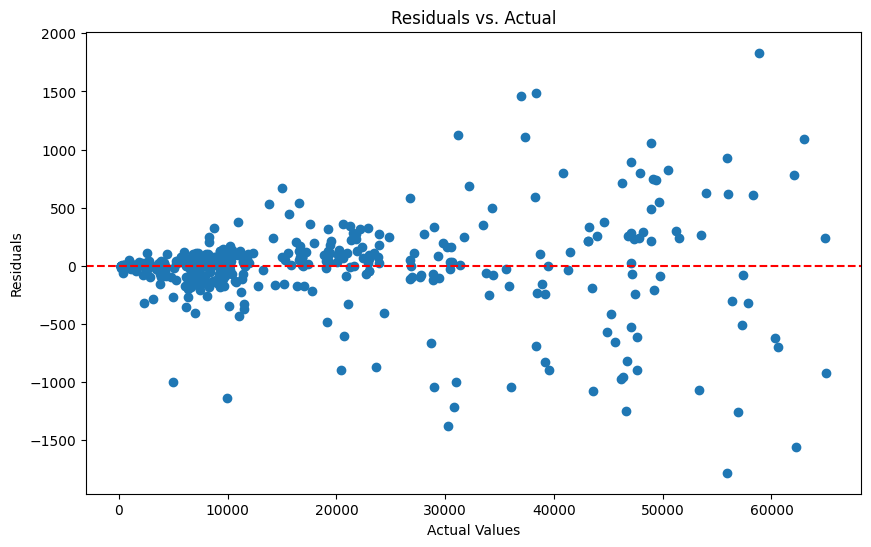

In [86]:
residuals = y_test - y_pred

plt.figure(figsize=(10, 6))
plt.scatter(y_test, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residuals vs. Actual')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.show()


In [90]:


# Initialize and train the Decision Tree
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

# Evaluate the model
mse_dt = mean_squared_error(y_test, y_pred_dt)
print(f"Decision Tree MSE: {mse_dt}")



Decision Tree MSE: 330903.0327339862


In [91]:
# Initialize and train the Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
print(f"Random Forest MSE: {mse_rf}")


Random Forest MSE: 190101.04852546463


In [94]:


# Initialize and train the SVM
svm_model = SVR(kernel='rbf')
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

# Evaluate the model
mse_svm = mean_squared_error(y_test, y_pred_svm)
print(f"SVM MSE: {mse_svm}")


SVM MSE: 258481690.2882911


In [96]:
print("NaNs in y_test:", y_test.isna().sum())
print("NaNs in X_test:", X_test.isna().sum().sum())


NaNs in y_test: 0
NaNs in X_test: 0


In [97]:
# If dropping NaNs
y_test = y_test.dropna()
X_test = X_test.dropna()

# If filling NaNs
X_test = X_test.fillna(X_test.mean())
y_test = y_test.fillna(y_test.mean())


In [98]:
# After prediction, check for NaNs
if np.isnan(y_pred_nn).any():
    print("Predictions contain NaNs")


Predictions contain NaNs


In [99]:
print("NaNs in X_train:", X_train.isna().sum().sum())
print("NaNs in y_train:", y_train.isna().sum())


NaNs in X_train: 0
NaNs in y_train: 0


In [100]:


nn_model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1)
])

# Using a smaller learning rate
nn_model.compile(optimizer=Adam(learning_rate=0.0001), loss='mean_squared_error')
nn_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)


Epoch 1/50
62/62 [==============================] - 2s 10ms/step - loss: nan - val_loss: nan
Epoch 2/50
62/62 [==============================] - 0s 5ms/step - loss: nan - val_loss: nan
Epoch 3/50
62/62 [==============================] - 0s 5ms/step - loss: nan - val_loss: nan
Epoch 4/50
62/62 [==============================] - 0s 5ms/step - loss: nan - val_loss: nan
Epoch 5/50
62/62 [==============================] - 0s 5ms/step - loss: nan - val_loss: nan
Epoch 6/50
62/62 [==============================] - 0s 5ms/step - loss: nan - val_loss: nan
Epoch 7/50
62/62 [==============================] - 0s 4ms/step - loss: nan - val_loss: nan
Epoch 8/50
62/62 [==============================] - 0s 5ms/step - loss: nan - val_loss: nan
Epoch 9/50
62/62 [==============================] - 0s 5ms/step - loss: nan - val_loss: nan
Epoch 10/50
62/62 [==============================] - 0s 5ms/step - loss: nan - val_loss: nan
Epoch 11/50
62/62 [==============================] - 0s 6ms/step - loss: nan -

In [103]:


nn_model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    BatchNormalization(),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dense(1)
])

nn_model.compile(optimizer='adam', loss='mean_squared_error')
nn_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)


Epoch 1/50
62/62 [==============================] - 2s 6ms/step - loss: 473602272.0000 - val_loss: 442900608.0000
Epoch 2/50
62/62 [==============================] - 0s 3ms/step - loss: 473411456.0000 - val_loss: 442817984.0000
Epoch 3/50
62/62 [==============================] - 0s 3ms/step - loss: 473203456.0000 - val_loss: 443006208.0000
Epoch 4/50
62/62 [==============================] - 0s 3ms/step - loss: 472957312.0000 - val_loss: 443150304.0000
Epoch 5/50
62/62 [==============================] - 0s 3ms/step - loss: 472652896.0000 - val_loss: 443407616.0000
Epoch 6/50
62/62 [==============================] - 0s 3ms/step - loss: 472283456.0000 - val_loss: 444270784.0000
Epoch 7/50
62/62 [==============================] - 0s 3ms/step - loss: 472082624.0000 - val_loss: 445312352.0000
Epoch 8/50
62/62 [==============================] - 0s 4ms/step - loss: 471526784.0000 - val_loss: 445068608.0000
Epoch 9/50
62/62 [==============================] - 0s 3ms/step - loss: 470948448.0000 -

In [104]:
nn_model.compile(optimizer='adam', loss='mean_squared_error')
nn_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)


Epoch 1/50
62/62 [==============================] - 4s 12ms/step - loss: 445049888.0000 - val_loss: 416067840.0000
Epoch 2/50
62/62 [==============================] - 0s 6ms/step - loss: 444211584.0000 - val_loss: 412429632.0000
Epoch 3/50
62/62 [==============================] - 0s 6ms/step - loss: 443355968.0000 - val_loss: 414099296.0000
Epoch 4/50
62/62 [==============================] - 0s 6ms/step - loss: 442486048.0000 - val_loss: 412268672.0000
Epoch 5/50
62/62 [==============================] - 0s 7ms/step - loss: 441597824.0000 - val_loss: 406990016.0000
Epoch 6/50
62/62 [==============================] - 0s 5ms/step - loss: 440694048.0000 - val_loss: 409182976.0000
Epoch 7/50
62/62 [==============================] - 0s 5ms/step - loss: 439773184.0000 - val_loss: 414041664.0000
Epoch 8/50
62/62 [==============================] - 0s 6ms/step - loss: 438841824.0000 - val_loss: 408085024.0000
Epoch 9/50
62/62 [==============================] - 0s 6ms/step - loss: 437890624.0000 

In [105]:
y_pred_nn = nn_model.predict(X_test)
if np.isnan(y_pred_nn).any():
    print("Predictions still contain NaNs after adjustments")
else:
    mse_nn = mean_squared_error(y_test, y_pred_nn.flatten())
    print(f"Adjusted Neural Network MSE: {mse_nn}")


20/20 [==============================] - 0s 4ms/step
Adjusted Neural Network MSE: 358497205.14240277


In [108]:

class TerminateOnNaN(Callback):
    def on_epoch_end(self, epoch, logs=None):
        loss = logs.get('loss')
        if loss is not None:
            if np.isnan(loss) or np.isinf(loss):
                print(f"Stopping training at epoch {epoch} as loss is {loss}")
                self.model.stop_training = True

nn_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, callbacks=[TerminateOnNaN()])


Epoch 1/50
62/62 [==============================] - 0s 7ms/step - loss: 388315648.0000 - val_loss: 366508352.0000
Epoch 2/50
62/62 [==============================] - 0s 3ms/step - loss: 386992320.0000 - val_loss: 364332768.0000
Epoch 3/50
62/62 [==============================] - 0s 3ms/step - loss: 385676000.0000 - val_loss: 352166688.0000
Epoch 4/50
62/62 [==============================] - 0s 4ms/step - loss: 384349152.0000 - val_loss: 345308864.0000
Epoch 5/50
62/62 [==============================] - 0s 4ms/step - loss: 383030368.0000 - val_loss: 347334112.0000
Epoch 6/50
62/62 [==============================] - 0s 3ms/step - loss: 381696352.0000 - val_loss: 342192320.0000
Epoch 7/50
62/62 [==============================] - 0s 3ms/step - loss: 380376960.0000 - val_loss: 353979200.0000
Epoch 8/50
62/62 [==============================] - 0s 4ms/step - loss: 379042432.0000 - val_loss: 360513344.0000
Epoch 9/50
62/62 [==============================] - 0s 4ms/step - loss: 377721632.0000 -

In [116]:

# Calculate mean squared error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Calculate mean absolute error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)



Mean Squared Error: 190101.04852546463
Mean Absolute Error: 202.6102838409027
R-squared: 0.9992215923692984


In [119]:

# Assuming you used degree 2 polynomial features during training
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Check the features after transformation
print("Number of features after polynomial transformation:", X_test_poly.shape[1])


Number of features after polynomial transformation: 14


In [118]:
print("Features in training set:", X_train.columns)
print("Features in test set:", X_test.columns)


Features in training set: Index(['Open', 'High', 'Low', 'Volume'], dtype='object')
Features in test set: Index(['Open', 'High', 'Low', 'Volume'], dtype='object')


In [120]:

# If degree 2 was originally used, it should produce 10 features for 4 original inputs
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Check the features again
print("Number of polynomial features:", X_test_poly.shape[1])


Number of polynomial features: 14


In [121]:

# Example with include_bias set to True
poly = PolynomialFeatures(degree=2, include_bias=True)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

print("Number of polynomial features with bias:", X_test_poly.shape[1])


Number of polynomial features with bias: 15


In [122]:
from sklearn.feature_selection import SelectKBest, f_regression

# Assuming the top 10 features were selected during training
selector = SelectKBest(f_regression, k=10)
X_train_selected = selector.fit_transform(X_train_poly, y_train)  # y_train is needed for feature selection based on target
X_test_selected = selector.transform(X_test_poly)

print("Number of features after selection:", X_test_selected.shape[1])


Number of features after selection: 10


In [123]:
# Assuming 'model' is your trained RandomForestRegressor
y_pred = model.predict(X_test_selected)


In [124]:

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)


Mean Squared Error: 415409499.72517926
R^2 Score: -0.700979173761253


In [125]:
# Predict on the training data
y_train_pred = model.predict(X_train_selected)

# Calculate MSE and R^2 for the training data
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

print("Training MSE:", train_mse)
print("Training R^2:", train_r2)


Training MSE: 467626828.9085663
Training R^2: -0.7817284049233264


In [128]:

# Example using R^2 as the scoring metric
scores = cross_val_score(model, X_train_selected, y_train, cv=5, scoring='r2')
print("Cross-validated R^2 scores:", scores)
print("Average R^2 score:", scores.mean())


Cross-validated R^2 scores: [0.9992419  0.99926126 0.9990702  0.99907886 0.99933179]
Average R^2 score: 0.9991968009106827


In [129]:
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.datasets import make_regression

# Example dataset
X, y = make_regression(n_samples=1000, n_features=4, noise=0.1)

# Setup the pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Feature scaling
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),  # Polynomial features
    ('model', RandomForestRegressor(n_estimators=100))  # The model
])

# Cross-validation setup
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Performing cross-validation
# It's important that the scoring parameter matches your project needs; here we use 'r2' for R^2 score.
cross_val_scores = cross_val_score(pipeline, X, y, cv=cv, scoring='r2')

print("Cross-validated R^2 scores:", cross_val_scores)
print("Average R^2 score:", cross_val_scores.mean())

# To further investigate or optimize model parameters, use GridSearchCV
param_grid = {
    'model__n_estimators': [100, 200],  # Example: Testing different numbers of trees
    'model__max_depth': [None, 10, 20],  # Example: Testing different tree depths
    'poly__degree': [1, 2]  # Testing polynomial degrees
}

# Grid search with pipeline
grid_search = GridSearchCV(pipeline, param_grid, cv=cv, scoring='r2', verbose=2)
grid_search.fit(X, y)

print("Best parameters:", grid_search.best_params_)
print("Best cross-validated R^2 score:", grid_search.best_score_)


Cross-validated R^2 scores: [0.9790233  0.97783273 0.97819316 0.96724383 0.97427745]
Average R^2 score: 0.9753140930519371
Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END model__max_depth=None, model__n_estimators=100, poly__degree=1; total time=   0.3s
[CV] END model__max_depth=None, model__n_estimators=100, poly__degree=1; total time=   0.4s
[CV] END model__max_depth=None, model__n_estimators=100, poly__degree=1; total time=   0.3s
[CV] END model__max_depth=None, model__n_estimators=100, poly__degree=1; total time=   0.3s
[CV] END model__max_depth=None, model__n_estimators=100, poly__degree=1; total time=   0.3s
[CV] END model__max_depth=None, model__n_estimators=100, poly__degree=2; total time=   1.1s
[CV] END model__max_depth=None, model__n_estimators=100, poly__degree=2; total time=   1.1s
[CV] END model__max_depth=None, model__n_estimators=100, poly__degree=2; total time=   1.2s
[CV] END model__max_depth=None, model__n_estimators=100, poly__degree=2; total t

In [130]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Set up the pipeline with the best parameters
final_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', RandomForestRegressor(n_estimators=200, max_depth=None, random_state=42))
])

# Fit the model on the entire training dataset
final_pipeline.fit(X_train, y_train)

# Predict on the test set
y_pred = final_pipeline.predict(X_test)

# Calculate MSE and R^2 for the test data
test_mse = mean_squared_error(y_test, y_pred)
test_r2 = r2_score(y_test, y_pred)

print("Test MSE:", test_mse)
print("Test R^2:", test_r2)


Test MSE: 185898.8088559095
Test R^2: 0.9992387992992454


In [132]:
# Manually define the feature names based on your dataset
feature_names = ['feature1', 'feature2', 'feature3', 'feature4']  # Update these with actual names

# Assuming 'final_pipeline' has been fitted and contains the RandomForestRegressor
importances = final_pipeline.named_steps['model'].feature_importances_
feature_importance_dict = {feature: importance for feature, importance in zip(feature_names, importances)}
sorted_importance = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

# Print the sorted feature importances
print("Sorted Feature Importances:")
for feature, importance in sorted_importance:
    print(f"{feature}: {importance:.4f}")


Sorted Feature Importances:
feature2: 0.5571
feature3: 0.4336
feature1: 0.0091
feature4: 0.0001


In [133]:
# Assuming you've already fitted the final model and have the feature names
importances = final_pipeline.named_steps['model'].feature_importances_
feature_importance_dict = {feature: importance for feature, importance in zip(feature_names, importances)}
sorted_importance = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)
print("Sorted Feature Importances:", sorted_importance)


Sorted Feature Importances: [('feature2', 0.5571190329551476), ('feature3', 0.4336185590612033), ('feature1', 0.009147253397370278), ('feature4', 0.00011515458627886574)]


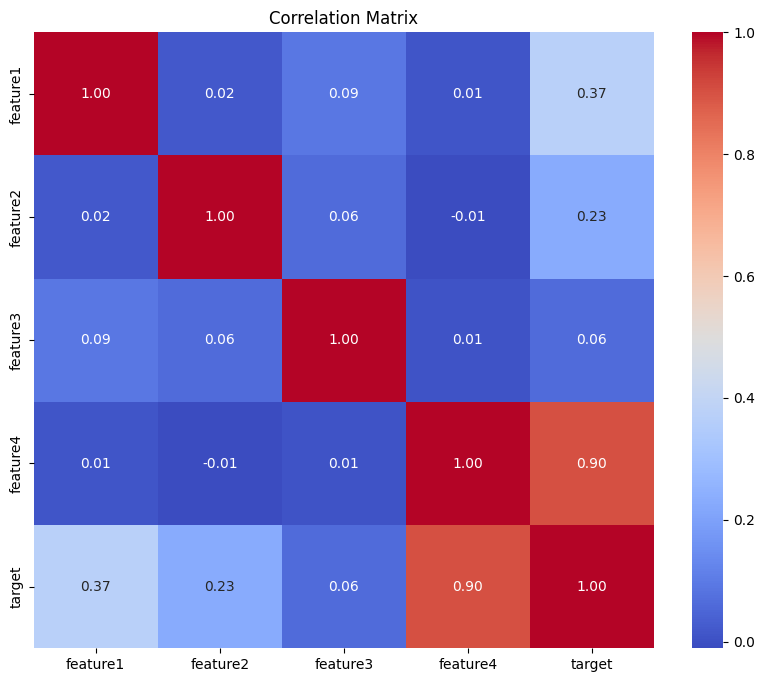

In [136]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assume 'X' is a numpy array; first convert it into a DataFrame with named columns
# Replace 'feature1', 'feature2', etc., with your actual feature names
feature_names = ['feature1', 'feature2', 'feature3', 'feature4']
X_df = pd.DataFrame(X, columns=feature_names)

# Convert 'y' into a DataFrame with a column name
y_df = pd.DataFrame(y, columns=['target'])

# Combine 'X_df' and 'y_df' into one DataFrame
data = pd.concat([X_df, y_df], axis=1)

# Compute the correlation matrix
corr_matrix = data.corr()

# Generate a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()



In [138]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Assuming you know the names and order of the features in X
feature_names = ['feature1', 'feature2', 'feature3', 'feature4']  # Adjust if you have more or different features
X_df = pd.DataFrame(X, columns=feature_names)

# Select only the important features
X_simplified = X_df[['feature2', 'feature3']]

# Split data into train and test sets
X_train_simplified, X_test_simplified, y_train, y_test = train_test_split(X_simplified, y, test_size=0.2, random_state=42)

# Create and fit the RandomForest model
simplified_model = RandomForestRegressor(n_estimators=200, random_state=42)
simplified_model.fit(X_train_simplified, y_train)

# Predict on the test set
y_pred_simplified = simplified_model.predict(X_test_simplified)

# Calculate MSE and R^2 for the simplified model
mse_simplified = mean_squared_error(y_test, y_pred_simplified)
r2_simplified = r2_score(y_test, y_pred_simplified)

print("MSE of Simplified Model:", mse_simplified)
print("R^2 of Simplified Model:", r2_simplified)



MSE of Simplified Model: 10833.01038117609
R^2 of Simplified Model: -0.05009504946971122


In [139]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5, scoring='r2', verbose=2)

# Fit grid_search to the data
grid_search.fit(X_train_simplified, y_train)

# Print the best parameters and best score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)


Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.7s
[CV] END max_de

In [140]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

# Create interaction term (product of feature2 and feature3)
interaction = np.expand_dims(X_train_simplified[:, 0] * X_train_simplified[:, 1], axis=1)

# Add interaction term to the existing feature matrix
X_train_enhanced = np.hstack((X_train_simplified, interaction))

# Repeat for test data
interaction_test = np.expand_dims(X_test_simplified[:, 0] * X_test_simplified[:, 1], axis=1)
X_test_enhanced = np.hstack((X_test_simplified, interaction_test))

# Fit the RandomForest model to the enhanced dataset
enhanced_model = RandomForestRegressor(n_estimators=200, random_state=42)
enhanced_model.fit(X_train_enhanced, y_train)

# Predict on the enhanced test set
y_pred_enhanced = enhanced_model.predict(X_test_enhanced)

# Calculate MSE and R^2 for the enhanced model
mse_enhanced = mean_squared_error(y_test, y_pred_enhanced)
r2_enhanced = r2_score(y_test, y_pred_enhanced)

print("MSE of Enhanced Model:", mse_enhanced)
print("R^2 of Enhanced Model:", r2_enhanced)


InvalidIndexError: (slice(None, None, None), 0)